In [1]:
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
from sklearn import metrics
from random import randint

In [2]:
from utils import plot_confusion_matrix

In [3]:
(x_train, y_train),(x_test, y_test) = tf.keras.datasets.mnist.load_data()

In [4]:
x_train, x_test = x_train / 255.0, x_test / 255.0

In [5]:
output_layer = tf.keras.layers.Dense(10, activation=tf.nn.softmax)

model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(),
  output_layer
])

In [6]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

Instructions for updating:
Colocations handled automatically by placer.


In [7]:
weight_history = []

In [8]:
save_weights = tf.keras.callbacks.LambdaCallback(on_batch_end=lambda batch, logs: weight_history.append(np.copy(output_layer.get_weights()[0].transpose())))

In [9]:
weight_history = []
model.fit(x_train, y_train, epochs=3, callbacks=[save_weights])
model.evaluate(x_test, y_test)

Epoch 1/3
60000/60000 [==============================] - 4s 61us/sample - loss: 0.4707 - acc: 0.8765
Epoch 2/3
60000/60000 [==============================] - 4s 60us/sample - loss: 0.3041 - acc: 0.9146
Epoch 3/3
10000/10000 [==============================] - 0s 33us/sample - loss: 0.2720 - acc: 0.9248


[0.2719665689677, 0.9248]

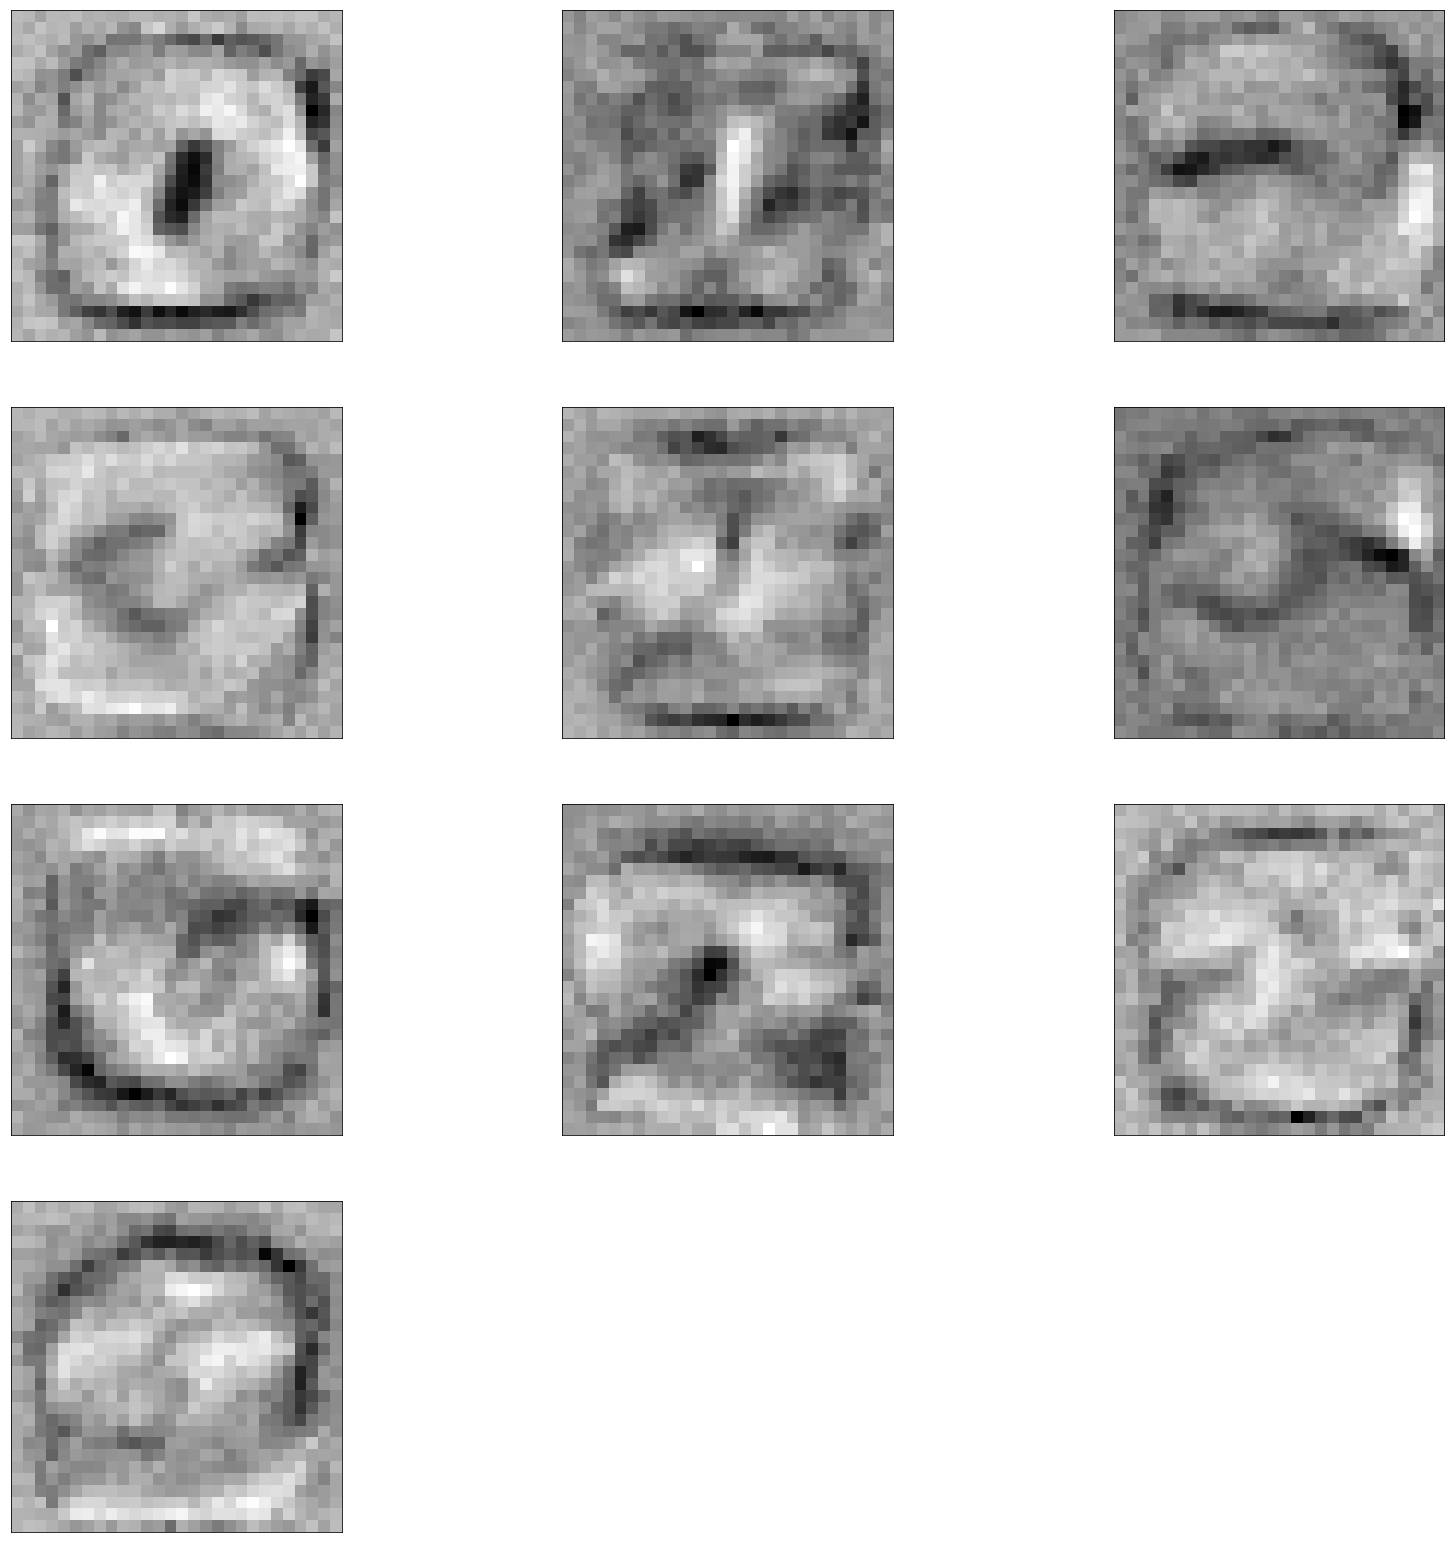

In [10]:
plt.subplots(sharex='col', sharey='row',figsize=(28, 28)) 

olw = output_layer.get_weights()[0].transpose()

for i in range(10):
    plt.subplot(4, 3, i + 1)
    plt.imshow(olw[i].reshape((28, 28)), cmap='gray')
    plt.xticks([])
    plt.yticks([])

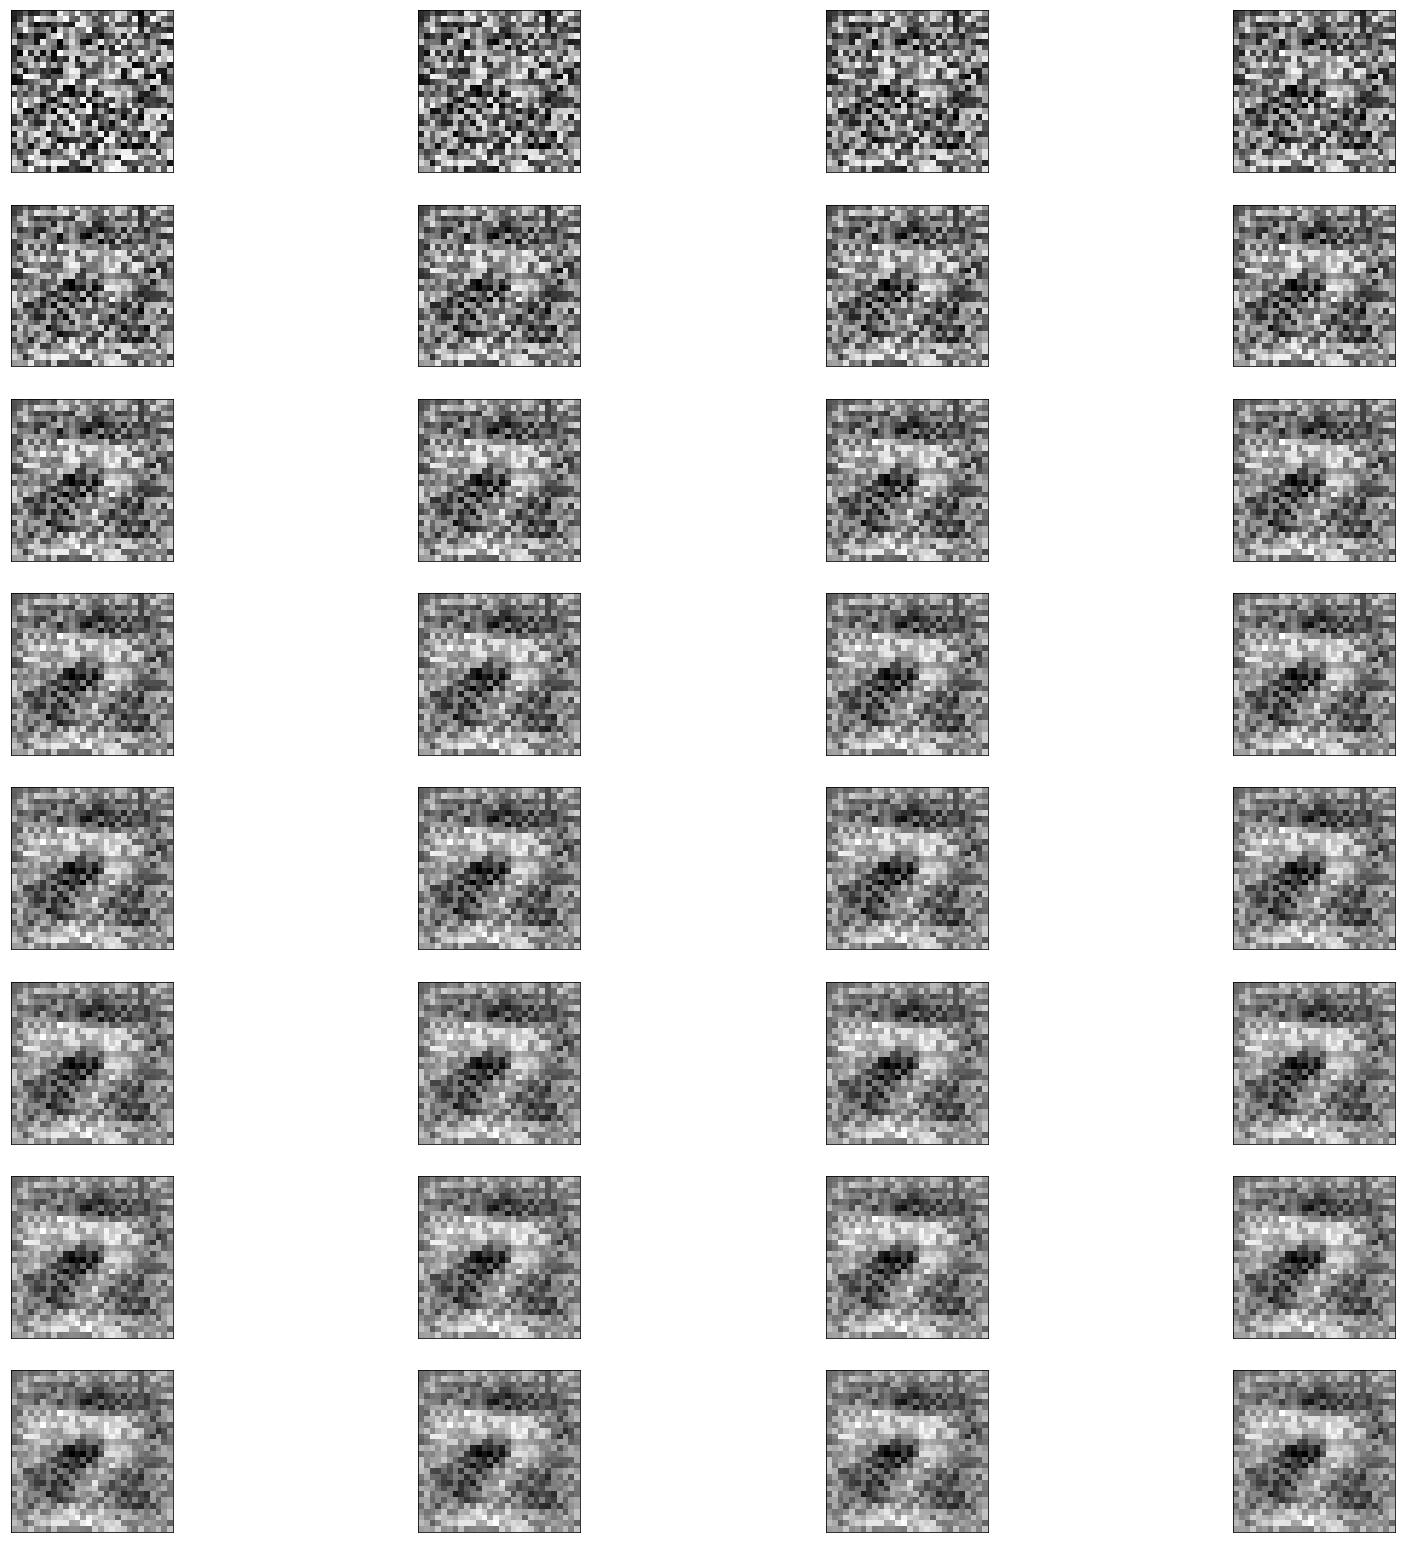

In [11]:
plt.subplots(4, 4, sharex='col', sharey='row',figsize=(28, 28)) 

for i in range(32):
    plt.subplot(8, 4, i + 1)
    plt.imshow(weight_history[i * 10][7].reshape((28, 28)), cmap='gray')
    plt.xticks([])
    plt.yticks([])

In [12]:
final_weights = output_layer.get_weights()

In [13]:
w = np.asarray(final_weights[0])

In [14]:
wt = w.transpose()

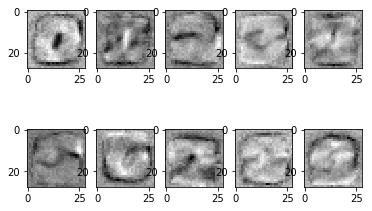

In [15]:
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(wt[i].reshape((28, 28)), cmap='gray')

<BarContainer object of 10 artists>

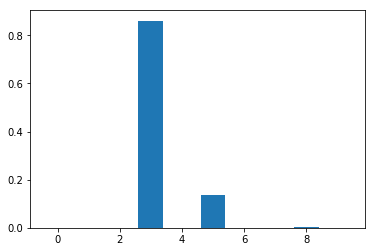

In [16]:
plt.bar(range(10), model.predict(np.expand_dims(x_test[32], 0))[0])

In [17]:
y_pred = np.argmax(model.predict(x_test), axis=1)

In [18]:
cm = metrics.confusion_matrix(y_test, y_pred, labels=range(10))

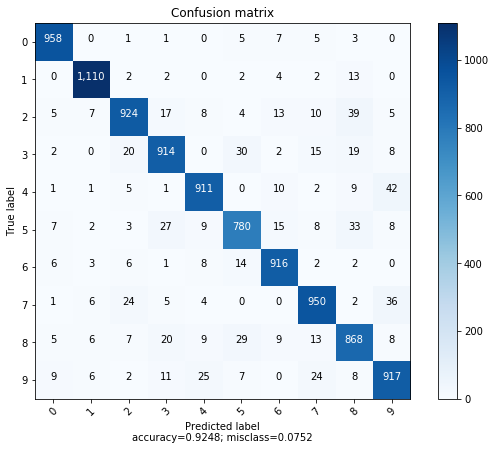

In [19]:
plot_confusion_matrix(cm, [str(i) for i in range(10)], normalize=False)